**Geometric Operations and Other Mathematical Tools**

<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling  </li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations</li> 
          </ul>


</ul>


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(121)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

**Geometric Transformations**

**Scaling**

We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


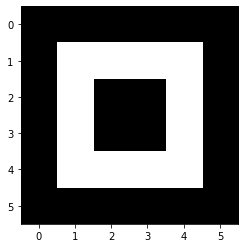

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [5]:
toy = np.zeros((6,6))
toy[1:5,1:5]=255
toy[2:4,2:4]=0
plt.imshow(toy, cmap='gray')
plt.show()
toy

We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis


The parameter interpolation estimates pixel values based on neighboring pixels. <code>INTER_NEAREST</code> uses the nearest pixel and <code>INTER_CUBIC</code> uses several pixels near the pixel value we would like to estimate.


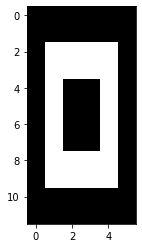

In [6]:
new_toy = cv2.resize(toy,None, fx=1,fy=2,interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy, cmap='gray')
plt.show()

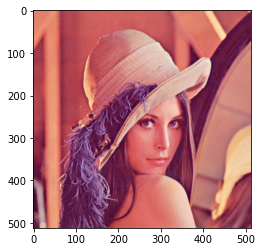

In [7]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

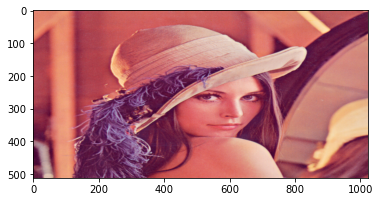

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [8]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

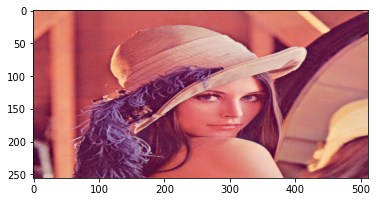

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [9]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

In [10]:
rows=100
cols=200

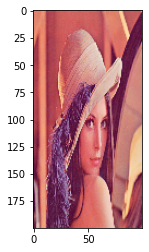

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [11]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

**Translation**

Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image. 

In this example, we shift the image 100 pixels horizontally:


In [12]:
tx=100
ty=0
M = np.float32([[1,0,tx],[0,1,ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [13]:
rows, cols, _ =image.shape

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


In [14]:
new_image = cv2.warpAffine(image, M, (cols,rows) )

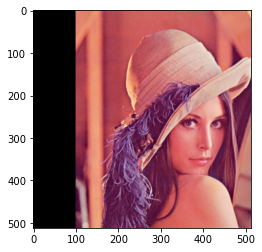

In [15]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

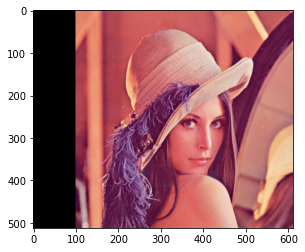

In [16]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

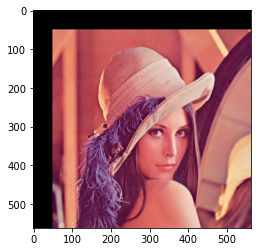

In [18]:
tx=50
ty=50
M=np.float32([[1,0,tx],[0,1,ty]])
rows,cols,_=image.shape
new_image = cv2.warpAffine(image, M, (cols+tx, rows+ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

**Rotation**

We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


We can rotate our toy image by 45 degrees:


In [19]:
theta =45
M = cv2.getRotationMatrix2D(center=(3,3), angle=theta, scale=1)
new_toy_image=cv2.warpAffine(toy, M, (6,6))

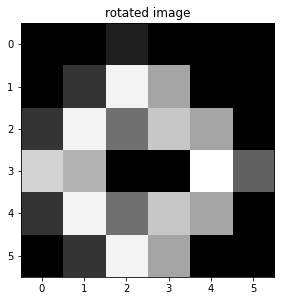

In [20]:
plot_image(toy, new_toy_image, title_1="Original", title_2="rotated image")

In [25]:
cols, rows,_ = image.shape

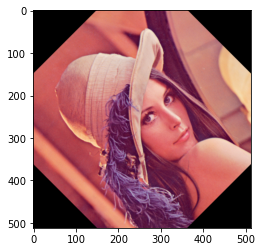

In [26]:
M = cv2.getRotationMatrix2D(center=(cols//2 -1, rows//2 -1), angle=theta, scale=1)
new_image=cv2.warpAffine(image, M, (cols, rows))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

**Mathematical Operations**

**Array Operations**

We can perform array operations on an image; using Python broadcasting, we can add a constant to each pixel's intensity value.

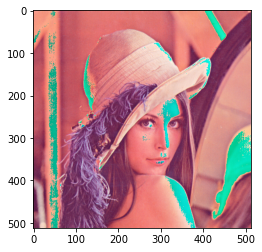

In [29]:
new_image=image+20
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.

In [30]:
Noise = np.random.normal(0, 20, (rows, cols, 3)). astype(np.uint8)
Noise.shape

(512, 512, 3)

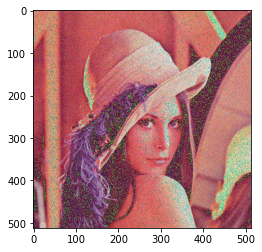

In [31]:
new_image = image+Noise
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

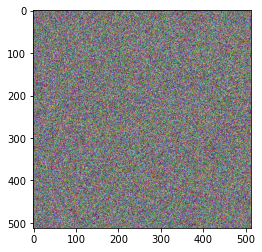

In [32]:
new_image = image*Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

**Matrix Operations**

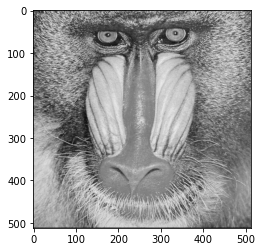

In [33]:
baboon = cv2.imread("baboon.png", cv2.IMREAD_GRAYSCALE)
baboon.shape
plt.imshow(baboon, cmap='gray')
plt.show()

We can apply algorithms designed for matrices. We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.

In [34]:
U, s, V = np.linalg.svd(baboon, full_matrices=True)

 We see 's' is not rectangular

In [35]:
s.shape

(512,)

We can convert 's' to a diagonal matrix S:

In [40]:
S = np.zeros((baboon.shape[0], baboon.shape[1]))
S[:baboon.shape[0], :baboon.shape[0]] = np.diag(s)

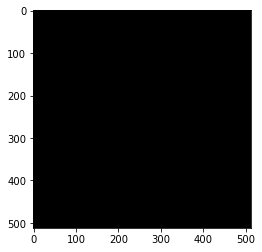

In [42]:
plt.imshow(S, cmap='gray')
plt.show()

We can plot the matrix U and V:

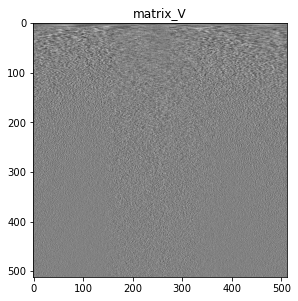

In [39]:
plot_image(U,V, title_1="Matrix_U", title_2="matrix_V")

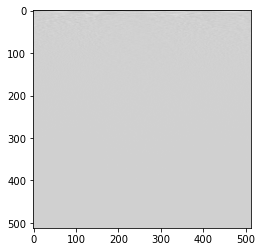

In [45]:
B = S.dot(V)
plt.imshow(B, cmap='gray')
plt.show()

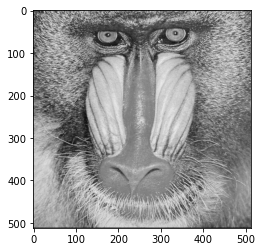

In [46]:
A = U.dot(B)
plt.imshow(A, cmap='gray')
plt.show()

It turns out many elements are redundant, so we can eliminate some rows and columns of S and V to approximate the image by finding the product.

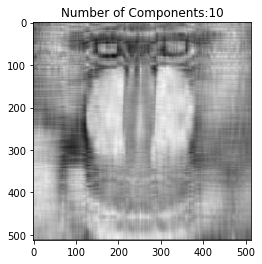

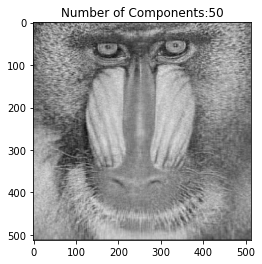

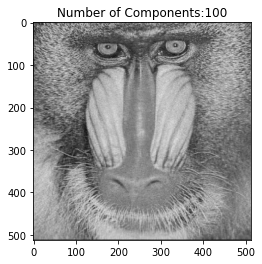

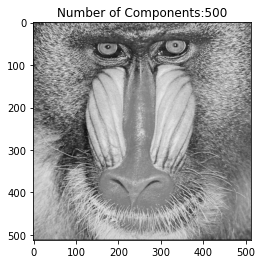

In [49]:
for n_components in [10, 50, 100, 500]:
    S_new = S[:, :n_components]
    V_new = V[:n_components, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A, cmap='gray')
    plt.title("Number of Components:" + str(n_components))
    plt.show()